Importing all the neccessary libararies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

import datetime
import tensorflow as tf

Creating a connection to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing the data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/merged_output.csv')

In [ ]:
df

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0
...,...,...,...,...,...,...,...,...,...
1754150,1754150,2018-09-30 23:56:36,161,655,54.24,15810996,182,0,0
1754151,1754151,2018-09-30 23:57:38,4342,6181,1.23,15811058,182,0,0
1754152,1754152,2018-09-30 23:58:21,618,1502,6.62,15811101,182,0,0
1754153,1754153,2018-09-30 23:59:52,4056,3067,55.40,15811192,182,0,0


Changing the datatypes of features repesenting time

In [ ]:
df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])
df['HOUR'] = df['TX_DATETIME'].dt.hour
df['DAY'] = df['TX_DATETIME'].dt.day
df['WEEKDAY'] = df['TX_DATETIME'].dt.weekday

Encoding categorical ID

In [ ]:
le_customer = LabelEncoder()
le_terminal = LabelEncoder()
df['CUSTOMER_ID'] = le_customer.fit_transform(df['CUSTOMER_ID'])
df['TERMINAL_ID'] = le_terminal.fit_transform(df['TERMINAL_ID'])

Scale features

In [ ]:
features = ['CUSTOMER_ID', 'TERMINAL_ID', 'TX_AMOUNT', 'HOUR', 'DAY', 'WEEKDAY']
X = df[features]
y = df['TX_FRAUD']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Splitting the data into training and testing data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

Building the neural network model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compiling the model

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)


Training the model

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/10
35084/35084 ━━━━━━━━━━━━━━━━━━━━ 94s 3ms/step - accuracy: 0.9924 - auc: 0.6257 - loss: 0.0455 - val_accuracy: 0.9929 - val_auc: 0.6426 - val_loss: 0.0415
Epoch 2/10
35084/35084 ━━━━━━━━━━━━━━━━━━━━ 93s 3ms/step - accuracy: 0.9932 - auc: 0.6456 - loss: 0.0395 - val_accuracy: 0.9931 - val_auc: 0.6421 - val_loss: 0.0404
Epoch 3/10
35084/35084 ━━━━━━━━━━━━━━━━━━━━ 103s 3ms/step - accuracy: 0.9935 - auc: 0.6414 - loss: 0.0385 - val_accuracy: 0.9932 - val_auc: 0.6402 - val_loss: 0.0404
Epoch 4/10
35084/35084 ━━━━━━━━━━━━━━━━━━━━ 137s 3ms/step - accuracy: 0.9934 - auc: 0.6440 - loss: 0.0386 - val_accuracy: 0.9931 - val_auc: 0.6420 - val_loss: 0.0404
Epoch 5/10
35084/35084 ━━━━━━━━━━━━━━━━━━━━ 93s 3ms/step - accuracy: 0.9934 - auc: 0.6407 - loss: 0.0391 - val_accuracy: 0.9931 - val_auc: 0.6458 - val_loss: 0.0404
Epoch 6/10
35084/35084 ━━━━━━━━━━━━━━━━━━━━ 140s 3ms/step - accuracy: 0.9934 - auc: 0.6551 - loss: 0.0386 - val_accuracy: 0.9931 - val_auc: 0.6333 - val_loss: 0.0405
Epoch 7

Evaluating the model

In [ ]:
loss, accuracy, auc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}, AUC: {auc:.2f}")

# Predict
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Report
print(classification_report(y_test, y_pred))

10964/10964 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9933 - auc: 0.6558 - loss: 0.0391
Test Accuracy: 0.99, AUC: 0.65
10964/10964 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    347895
           1       0.85      0.23      0.36      2936

    accuracy                           0.99    350831
   macro avg       0.92      0.61      0.68    350831
weighted avg       0.99      0.99      0.99    350831



Visualizng the accuracy over epochs

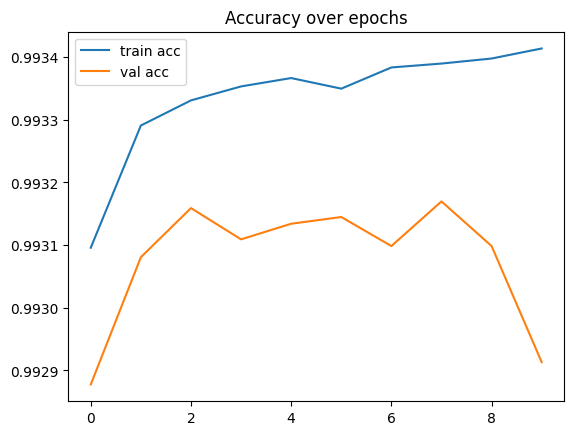

In [ ]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("Accuracy over epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()